In [1]:
!unzip /content/Dataset.zip

Archive:  /content/Dataset.zip
   creating: Dataset/Test/
   creating: Dataset/Test/Parasite/
 extracting: Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_10.png  
 extracting: Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_11.png  
  inflating: Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_12.png  
 extracting: Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_13.png  
 extracting: Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_14.png  
  inflating: Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_15.png  
 extracting: Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_16.png  
 extracting: Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_17.png  
 extracting: Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_18.png  
 extracting: Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_19.png  
 extracting: Dat

In [2]:
!pip install tensorflow

In [3]:

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

IMAGE_SIZE=[224, 224]

train_path='/content/Dataset/Train'
test_path='/content/Dataset/Test'

# Using imagenet weights with VGG19 model
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
# Droped the first and last layer since the output layer having only 2 categories



80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [4]:
for layer in vgg.layers:
  layer.trainable=False

folders=glob('/content/Dataset/Train/*')


In [5]:
x = Flatten()(vgg.output)

prediction=Dense(len(folders), activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │        50,178 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,074,562 (76.58 MB)

 Trainable params: 50,178 (196.01 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [6]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [7]:


from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Applying data augmentation when loading the images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen=ImageDataGenerator(rescale=1./255)



In [8]:

training_set = train_datagen.flow_from_directory('/content/Dataset/Train',
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode='categorical')



Found 416 images belonging to 2 classes.


In [9]:
test_set = test_datagen.flow_from_directory('/content/Dataset/Test',
                                            target_size=(224, 224),
                                            batch_size=32,
                                            class_mode='categorical')


Found 134 images belonging to 2 classes.


In [10]:
history = model.fit(
    training_set,
    validation_data=test_set,
    epochs=50,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 24s 802ms/step - accuracy: 0.5125 - loss: 1.0206 - val_accuracy: 0.4776 - val_loss: 0.8040
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 522ms/step - accuracy: 0.6803 - loss: 0.6337 - val_accuracy: 0.6940 - val_loss: 0.5665
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 555ms/step - accuracy: 0.7278 - loss: 0.5325 - val_accuracy: 0.6567 - val_loss: 0.5844
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 455ms/step - accuracy: 0.8196 - loss: 0.4274 - val_accuracy: 0.7612 - val_loss: 0.4762
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 494ms/step - accuracy: 0.8419 - loss: 0.3812 - val_accuracy: 0.7313 - val_loss: 0.4589
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 467ms/step - accuracy: 0.8693 - loss: 0.3496 - val_accuracy: 0.7612 - val_loss: 0.4589
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 483ms/step - accuracy: 0.8833 - loss: 0.3155 - val_accuracy: 0.7910 - val_loss: 0.4045
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 478ms/step - accuracy: 0.9002 - loss: 0.2975 - val_accurac

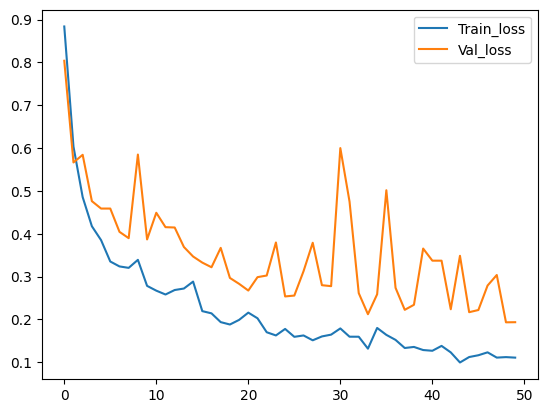

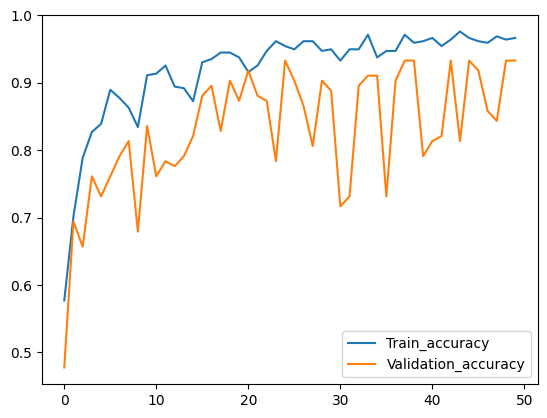

<Figure size 640x480 with 0 Axes>

In [11]:
## Plotting the loss
plt.plot(history.history['loss'], label='Train_loss' )
plt.plot(history.history['val_loss'], label='Val_loss')
plt.legend()
plt.show()
plt.savefig('evaluationFig')

# Plotting the accuracy
plt.plot(history.history['accuracy'], label='Train_accuracy')
plt.plot(history.history['val_accuracy'], label='Validation_accuracy')
plt.legend()
plt.show()
plt.savefig('accuracyEvaluationFig')

In [12]:
import pickle

file_path='model.pkl'

# Saving the model
with open(file_path, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved to {file_path}")

Model saved to model.pkl


In [13]:
from google.colab import files

files.download(file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>